# **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from random import randint
from random import shuffle

# **Evolutionary Algorithm**

In [ ]:
class Evolutionary_Algorithm():
  def __init__(self, costs_matrix, population_count, selection_count, epoch=1000, c_rate=0.9, m_rate=0.02):
    self.population_cnt = population_count
    self.selection_cnt = selection_count
    self.epoch = epoch
    self.c_rate = c_rate
    self.m_rate = m_rate
    self.costs_mat = costs_matrix
    self.n_cities = costs_matrix.shape[0]

  def tournament(self,):

      selected_population = []
      paths_arr = np.array([np.random.permutation(self.n_cities) for _ in range(self.population_cnt)])
      paths_arr = np.hstack([paths_arr, paths_arr[:, 0:1]])

      # Pre-compute costs for all paths
      paths_costs = np.sum(self.costs_mat[paths_arr[:, :-1], paths_arr[:, 1:]], axis=1)

      for _ in range(self.population_cnt):
          # Randomly select 's' paths for tournament
          selected_paths_indices = np.random.choice(self.population_cnt, size=self.selection_cnt, replace=False)
          # Select the path with the minimum cost from the subset
          best_index = selected_paths_indices[np.argmin(paths_costs[selected_paths_indices])]
          selected_population.append(paths_arr[best_index][:-1].tolist())

      return selected_population


  def cyclic_cross_over(self, population):
      children = []
      recombined_parents = []
      shuffle(population)
      pop_array = np.array(population)

      for i in range(0, len(pop_array), 2):
          if i + 1 < len(pop_array):
              parent_1, parent_2 = pop_array[i], pop_array[i+1]

              if not np.array_equal(parent_1, parent_2) and random.random() <= 0.5:
                  recombined_parents.extend([parent_1, parent_2])
                  child_1, child_2 = parent_1.copy(), parent_2.copy()
                  mask = np.zeros(len(parent_1), dtype=bool)

                  turn = 0

                  while not np.all(mask):  # Continue until all genes are visited

                      idx = np.where(~mask)[0][0]  # Find the first unvisited index
                      cycle_start_index = idx
                      turn += 1

                      while True:
                          mask[idx] = True
                          if turn % 2 == 0:  # Alternate between parents for each cycle
                              child_1[idx], child_2[idx] = parent_2[idx], parent_1[idx]
                          idx = np.where(parent_1 == parent_2[idx])[0][0]

                          if idx == cycle_start_index:  # Cycle complete
                              break
                  children.extend([child_1, child_2])

              else:
                children.extend([parent_1, parent_2])

      return recombined_parents, children



  def mutation(self, children):
      children = np.array(children)
      mutation_mask = np.random.rand(len(children)) <= self.m_rate

      # Efficient mutation
      for idx in np.where(mutation_mask)[0]:
          swap_indices = np.random.choice(len(children[idx]), 2, replace=False)
          children[idx][swap_indices[0]], children[idx][swap_indices[1]] = children[idx][swap_indices[1]], children[idx][swap_indices[0]]

      return children.tolist()


  def Iterate(self,):

      selected_population = self.tournament()
      best_fitnesses, worst_fitnesses, mean_fitnesses, min_fitnesses = [], [], [], []

      for i in range(1, self.epoch+1):

          parents,children = self.cyclic_cross_over(selected_population)
          mutated_children = self.mutation(children)
          new_population = parents + mutated_children
          new_population = np.array(new_population)
          new_population = np.hstack([new_population, new_population[:, 0:1]])
          fitness_arr = np.sum(self.costs_mat[new_population[:,:-1], new_population[:, 1:]], axis=1)

          min_fitnesses.append(np.min(fitness_arr))
          new_population = np.hstack([new_population, fitness_arr.reshape(-1,1)])
          new_population = new_population[np.argsort(new_population[:, -1])]

          best_fitnesses.append(new_population[0][-1])
          worst_fitnesses.append(new_population[-1][-1])
          mean_fitnesses.append(np.mean(new_population[:,-1]))

          final_population = new_population[:self.population_cnt]

          print(f'epoch-{i}: best fitness = {final_population[0][-1]}, min_fitness till now: {min(min_fitnesses)}')
          selected_population = final_population[:,:-2].tolist()

      self.Plot(best_fitnesses, worst_fitnesses, mean_fitnesses)


  def Plot(self, best_fits, worst_fits, mean_fits):
      x = np.arange(0, self.epoch)
      best_fitnesses = np.array(best_fits)
      worst_fitnesses = np.array(worst_fits)
      mean_fitnesses = np.array(mean_fits)
      plt.plot(x, best_fitnesses, x, worst_fitnesses, x, mean_fitnesses)
      plt.title("Best & Worst distances")
      plt.xlabel('epoch')
      plt.ylabel('cost')
      plt.legend(['Best distance','Worst distance','Mean distance'])
      plt.show()


# **bayg29 - 29 cities**

In [ ]:
df = pd.read_csv('/content/bayg29xml.csv')
costs = df['cost'].values
costs_matrix = np.insert(costs, np.arange(0, len(costs)+1, 29), 0).reshape(29, 29)

epoch-1: best fitness = 3629, min_fitness till now: 3629
epoch-2: best fitness = 3629, min_fitness till now: 3629
epoch-3: best fitness = 3629, min_fitness till now: 3629
epoch-4: best fitness = 3624, min_fitness till now: 3624
epoch-5: best fitness = 3252, min_fitness till now: 3252
epoch-6: best fitness = 3252, min_fitness till now: 3252
epoch-7: best fitness = 3252, min_fitness till now: 3252
epoch-8: best fitness = 3252, min_fitness till now: 3252
epoch-9: best fitness = 3252, min_fitness till now: 3252
epoch-10: best fitness = 3252, min_fitness till now: 3252
epoch-11: best fitness = 3252, min_fitness till now: 3252
epoch-12: best fitness = 3252, min_fitness till now: 3252
epoch-13: best fitness = 3252, min_fitness till now: 3252
epoch-14: best fitness = 3234, min_fitness till now: 3234
epoch-15: best fitness = 3234, min_fitness till now: 3234
epoch-16: best fitness = 3234, min_fitness till now: 3234
epoch-17: best fitness = 3234, min_fitness till now: 3234
epoch-18: best fitness 

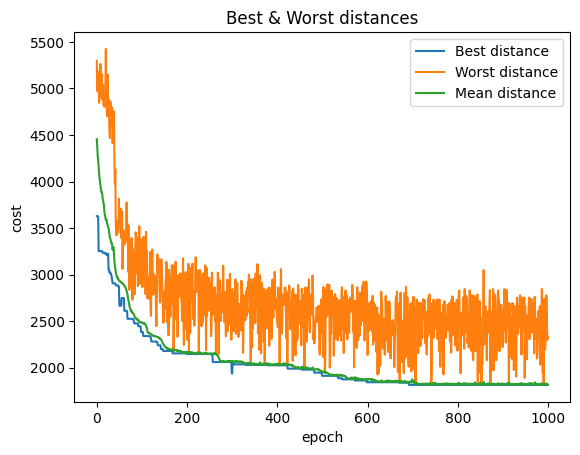

In [ ]:
EA = Evolutionary_Algorithm(costs_matrix=costs_matrix, population_count=200, selection_count= 3, epoch=1000, c_rate=0.9, m_rate=0.02)
EA.Iterate()

In [ ]:
df = pd.read_csv('/content/bayg29xml.csv')

costs = df['cost'].values
costs_list=[]
for i in range(0,813,29):
  costs_list.append(0)
  temp_costs = costs[i:i+29]
  for j in temp_costs:
   costs_list.append(j)
costs_mat = np.asarray(costs_list).reshape((29,29))

epoch-1: best fitness =  3689
epoch-2: best fitness =  3482
epoch-3: best fitness =  3334
epoch-4: best fitness =  3153
epoch-5: best fitness =  3153
epoch-6: best fitness =  3138
epoch-7: best fitness =  3060
epoch-8: best fitness =  3060
epoch-9: best fitness =  3060
epoch-10: best fitness =  3060
epoch-11: best fitness =  2999
epoch-12: best fitness =  2999
epoch-13: best fitness =  2999
epoch-14: best fitness =  2999
epoch-15: best fitness =  2999
epoch-16: best fitness =  2999
epoch-17: best fitness =  2928
epoch-18: best fitness =  2878
epoch-19: best fitness =  2878
epoch-20: best fitness =  2752
epoch-21: best fitness =  2732
epoch-22: best fitness =  2703
epoch-23: best fitness =  2612
epoch-24: best fitness =  2612
epoch-25: best fitness =  2612
epoch-26: best fitness =  2612
epoch-27: best fitness =  2583
epoch-28: best fitness =  2583
epoch-29: best fitness =  2494
epoch-30: best fitness =  2494
epoch-31: best fitness =  2494
epoch-32: best fitness =  2494
epoch-33: best fi

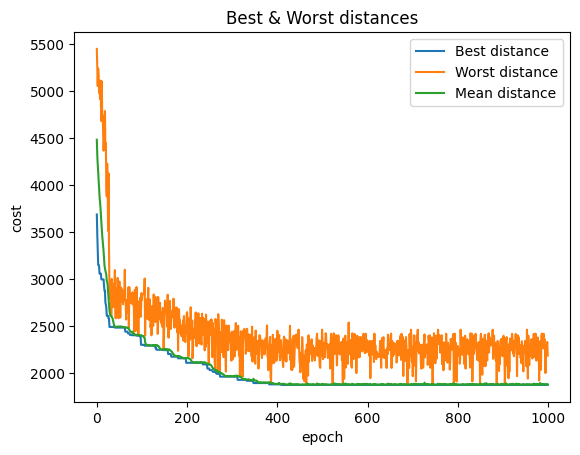

## Initial conditions: pop-size:200, c-rate:0.9, m-rate:0.02

### 1. Increasing mutation rate

pop-size:200, c-rate:0.9, m-rate:0.2

epoch-1: best fitness =  3653
epoch-2: best fitness =  3653
epoch-3: best fitness =  3535
epoch-4: best fitness =  3263
epoch-5: best fitness =  3263
epoch-6: best fitness =  3263
epoch-7: best fitness =  3255
epoch-8: best fitness =  3190
epoch-9: best fitness =  3190
epoch-10: best fitness =  3180
epoch-11: best fitness =  3013
epoch-12: best fitness =  3013
epoch-13: best fitness =  2995
epoch-14: best fitness =  2995
epoch-15: best fitness =  2983
epoch-16: best fitness =  2587
epoch-17: best fitness =  2587
epoch-18: best fitness =  2587
epoch-19: best fitness =  2587
epoch-20: best fitness =  2571
epoch-21: best fitness =  2563
epoch-22: best fitness =  2408
epoch-23: best fitness =  2408
epoch-24: best fitness =  2408
epoch-25: best fitness =  2408
epoch-26: best fitness =  2408
epoch-27: best fitness =  2408
epoch-28: best fitness =  2408
epoch-29: best fitness =  2408
epoch-30: best fitness =  2374
epoch-31: best fitness =  2348
epoch-32: best fitness =  2348
epoch-33: best fi

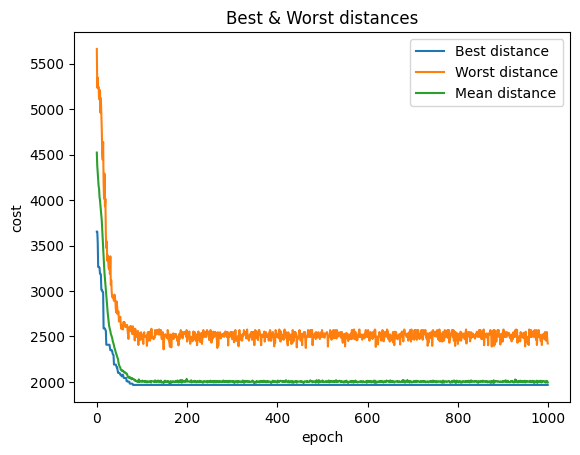

In [ ]:
EA = Evolutionary_Algorithm(costs_matrix=costs_matrix, population_count=200, selection_count= 3, epoch=1000, c_rate=0.9, m_rate=0.2)
EA.Iterate()

pop-size:200, c-rate:0.9, m-rate:0.5

epoch-1: best fitness =  3415
epoch-2: best fitness =  3415
epoch-3: best fitness =  3415
epoch-4: best fitness =  3415
epoch-5: best fitness =  3415
epoch-6: best fitness =  3415
epoch-7: best fitness =  3187
epoch-8: best fitness =  3187
epoch-9: best fitness =  3169
epoch-10: best fitness =  3169
epoch-11: best fitness =  3169
epoch-12: best fitness =  3169
epoch-13: best fitness =  2927
epoch-14: best fitness =  2927
epoch-15: best fitness =  2927
epoch-16: best fitness =  2927
epoch-17: best fitness =  2897
epoch-18: best fitness =  2897
epoch-19: best fitness =  2862
epoch-20: best fitness =  2805
epoch-21: best fitness =  2805
epoch-22: best fitness =  2802
epoch-23: best fitness =  2796
epoch-24: best fitness =  2793
epoch-25: best fitness =  2734
epoch-26: best fitness =  2734
epoch-27: best fitness =  2627
epoch-28: best fitness =  2627
epoch-29: best fitness =  2573
epoch-30: best fitness =  2573
epoch-31: best fitness =  2326
epoch-32: best fitness =  2326
epoch-33: best fi

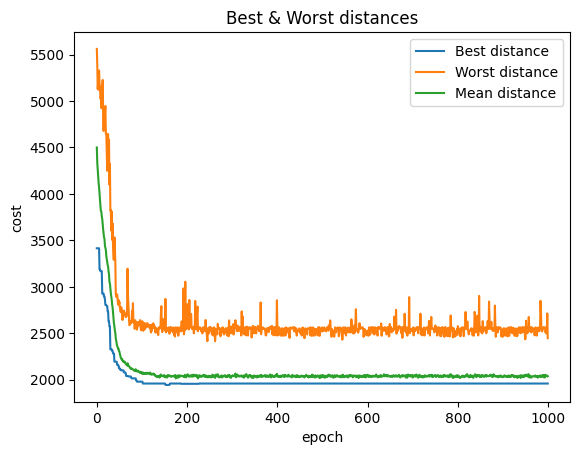

In [ ]:
EA = Evolutionary_Algorithm(costs_matrix=costs_matrix, population_count=200, selection_count= 3, epoch=1000, c_rate=0.9, m_rate=0.5)
EA.Iterate()

pop-size:200, c-rate:0.9, m-rate:0.9

epoch-1: best fitness =  3736
epoch-2: best fitness =  3458
epoch-3: best fitness =  3458
epoch-4: best fitness =  3458
epoch-5: best fitness =  3458
epoch-6: best fitness =  3458
epoch-7: best fitness =  3458
epoch-8: best fitness =  3423
epoch-9: best fitness =  3414
epoch-10: best fitness =  3245
epoch-11: best fitness =  3233
epoch-12: best fitness =  3150
epoch-13: best fitness =  3150
epoch-14: best fitness =  3150
epoch-15: best fitness =  3150
epoch-16: best fitness =  3040
epoch-17: best fitness =  3040
epoch-18: best fitness =  3040
epoch-19: best fitness =  3010
epoch-20: best fitness =  3010
epoch-21: best fitness =  2942
epoch-22: best fitness =  2942
epoch-23: best fitness =  2942
epoch-24: best fitness =  2845
epoch-25: best fitness =  2845
epoch-26: best fitness =  2845
epoch-27: best fitness =  2845
epoch-28: best fitness =  2845
epoch-29: best fitness =  2845
epoch-30: best fitness =  2845
epoch-31: best fitness =  2845
epoch-32: best fitness =  2845
epoch-33: best fi

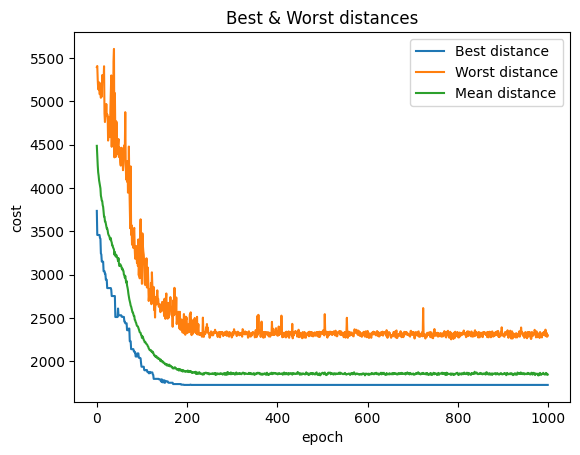

In [ ]:
EA = Evolutionary_Algorithm(costs_matrix=costs_matrix, population_count=200, selection_count= 3, epoch=1000, c_rate=0.9, m_rate=0.9)
EA.Iterate()

### 2. Decreasing cross-over rate

pop-size:200, c-rate:0.6, m-rate:0.02

epoch-1: best fitness =  3783
epoch-2: best fitness =  3783
epoch-3: best fitness =  3783
epoch-4: best fitness =  3365
epoch-5: best fitness =  3365
epoch-6: best fitness =  3365
epoch-7: best fitness =  3365
epoch-8: best fitness =  3365
epoch-9: best fitness =  3365
epoch-10: best fitness =  3365
epoch-11: best fitness =  3365
epoch-12: best fitness =  3355
epoch-13: best fitness =  3355
epoch-14: best fitness =  3164
epoch-15: best fitness =  3164
epoch-16: best fitness =  3019
epoch-17: best fitness =  3019
epoch-18: best fitness =  3019
epoch-19: best fitness =  3019
epoch-20: best fitness =  3019
epoch-21: best fitness =  3013
epoch-22: best fitness =  2978
epoch-23: best fitness =  2950
epoch-24: best fitness =  2950
epoch-25: best fitness =  2950
epoch-26: best fitness =  2768
epoch-27: best fitness =  2768
epoch-28: best fitness =  2768
epoch-29: best fitness =  2680
epoch-30: best fitness =  2587
epoch-31: best fitness =  2587
epoch-32: best fitness =  2587
epoch-33: best fi

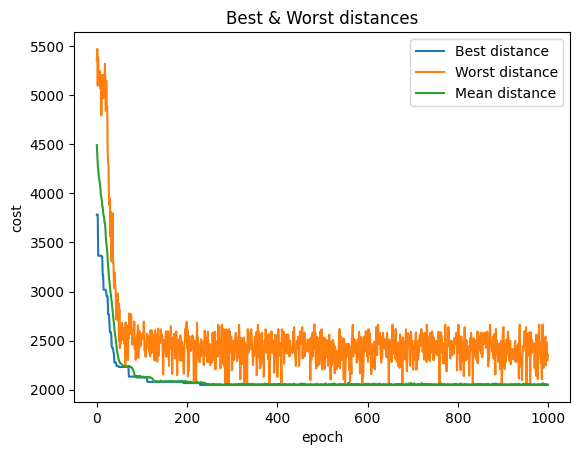

In [ ]:
EA = Evolutionary_Algorithm(costs_matrix=costs_matrix, population_count=200, selection_count= 3, epoch=1000, c_rate=0.6, m_rate=0.02)
EA.Iterate()

### 3. Increasing population size

pop-size:500, c-rate:0.9, m-rate:0.02

epoch-1: best fitness =  3461
epoch-2: best fitness =  3461
epoch-3: best fitness =  3461
epoch-4: best fitness =  3264
epoch-5: best fitness =  3264
epoch-6: best fitness =  3264
epoch-7: best fitness =  3264
epoch-8: best fitness =  3264
epoch-9: best fitness =  3264
epoch-10: best fitness =  3233
epoch-11: best fitness =  3111
epoch-12: best fitness =  3076
epoch-13: best fitness =  3076
epoch-14: best fitness =  3076
epoch-15: best fitness =  3076
epoch-16: best fitness =  3026
epoch-17: best fitness =  3026
epoch-18: best fitness =  3026
epoch-19: best fitness =  2962
epoch-20: best fitness =  2869
epoch-21: best fitness =  2869
epoch-22: best fitness =  2869
epoch-23: best fitness =  2869
epoch-24: best fitness =  2869
epoch-25: best fitness =  2869
epoch-26: best fitness =  2838
epoch-27: best fitness =  2838
epoch-28: best fitness =  2838
epoch-29: best fitness =  2685
epoch-30: best fitness =  2685
epoch-31: best fitness =  2644
epoch-32: best fitness =  2563
epoch-33: best fi

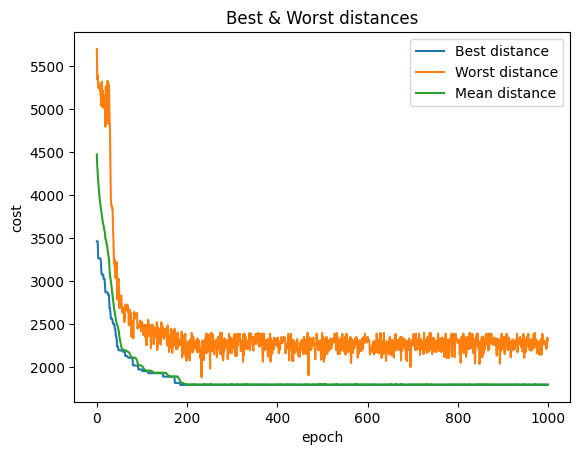

In [ ]:
EA = Evolutionary_Algorithm(costs_matrix=costs_matrix, population_count=500, selection_count= 3, epoch=1000, c_rate=0.9, m_rate=0.02)
EA.Iterate()

pop-size:1000, c-rate:0.9, m-rate:0.02

epoch-1: best fitness =  3454
epoch-2: best fitness =  3454
epoch-3: best fitness =  3454
epoch-4: best fitness =  3359
epoch-5: best fitness =  3359
epoch-6: best fitness =  3220
epoch-7: best fitness =  3123
epoch-8: best fitness =  3123
epoch-9: best fitness =  2952
epoch-10: best fitness =  2952
epoch-11: best fitness =  2952
epoch-12: best fitness =  2659
epoch-13: best fitness =  2659
epoch-14: best fitness =  2659
epoch-15: best fitness =  2659
epoch-16: best fitness =  2659
epoch-17: best fitness =  2659
epoch-18: best fitness =  2659
epoch-19: best fitness =  2659
epoch-20: best fitness =  2659
epoch-21: best fitness =  2659
epoch-22: best fitness =  2639
epoch-23: best fitness =  2639
epoch-24: best fitness =  2639
epoch-25: best fitness =  2639
epoch-26: best fitness =  2596
epoch-27: best fitness =  2596
epoch-28: best fitness =  2575
epoch-29: best fitness =  2371
epoch-30: best fitness =  2336
epoch-31: best fitness =  2336
epoch-32: best fitness =  2336
epoch-33: best fi

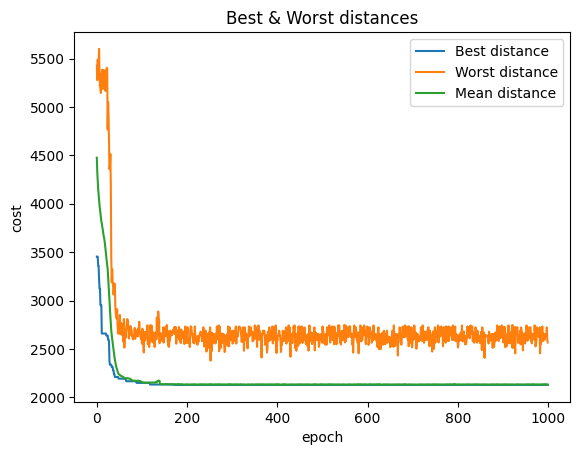

In [ ]:
EA = Evolutionary_Algorithm(costs_matrix=costs_matrix, population_count=1000, selection_count= 3, epoch=1000, c_rate=0.9, m_rate=0.02)
EA.Iterate()

### Decreasing pop-size

epoch-1: best fitness =  3756
epoch-2: best fitness =  3691
epoch-3: best fitness =  3691
epoch-4: best fitness =  3691
epoch-5: best fitness =  3673
epoch-6: best fitness =  3318
epoch-7: best fitness =  3318
epoch-8: best fitness =  3276
epoch-9: best fitness =  3276
epoch-10: best fitness =  3202
epoch-11: best fitness =  3202
epoch-12: best fitness =  3202
epoch-13: best fitness =  3088
epoch-14: best fitness =  2921
epoch-15: best fitness =  2921
epoch-16: best fitness =  2921
epoch-17: best fitness =  2921
epoch-18: best fitness =  2921
epoch-19: best fitness =  2921
epoch-20: best fitness =  2921
epoch-21: best fitness =  2921
epoch-22: best fitness =  2921
epoch-23: best fitness =  2921
epoch-24: best fitness =  2921
epoch-25: best fitness =  2909
epoch-26: best fitness =  2909
epoch-27: best fitness =  2909
epoch-28: best fitness =  2866
epoch-29: best fitness =  2866
epoch-30: best fitness =  2866
epoch-31: best fitness =  2866
epoch-32: best fitness =  2866
epoch-33: best fi

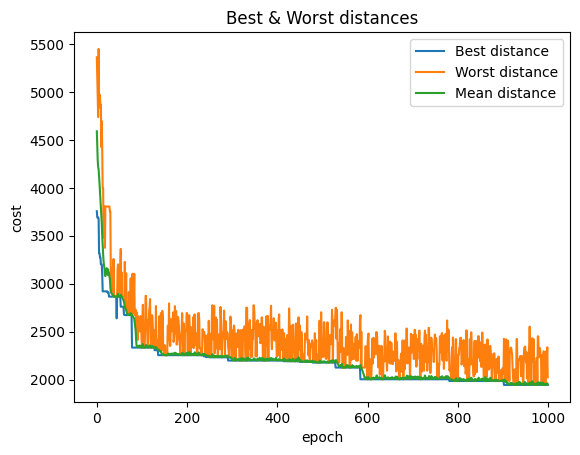

In [ ]:
EA = Evolutionary_Algorithm(costs_matrix=costs_matrix, population_count=50, selection_count= 3, epoch=1000, c_rate=0.9, m_rate=0.02)
EA.Iterate()

### Increase pop-size and decrease cross-over rate for best mutation rate

pop-size:1000, c-rate:0.9, m-rate:0.5

epoch-1: best fitness =  3657
epoch-2: best fitness =  3585
epoch-3: best fitness =  3414
epoch-4: best fitness =  3414
epoch-5: best fitness =  3184
epoch-6: best fitness =  3184
epoch-7: best fitness =  3184
epoch-8: best fitness =  3184
epoch-9: best fitness =  3184
epoch-10: best fitness =  3184
epoch-11: best fitness =  3108
epoch-12: best fitness =  3108
epoch-13: best fitness =  2941
epoch-14: best fitness =  2941
epoch-15: best fitness =  2941
epoch-16: best fitness =  2941
epoch-17: best fitness =  2941
epoch-18: best fitness =  2934
epoch-19: best fitness =  2908
epoch-20: best fitness =  2908
epoch-21: best fitness =  2908
epoch-22: best fitness =  2908
epoch-23: best fitness =  2908
epoch-24: best fitness =  2734
epoch-25: best fitness =  2734
epoch-26: best fitness =  2734
epoch-27: best fitness =  2597
epoch-28: best fitness =  2597
epoch-29: best fitness =  2597
epoch-30: best fitness =  2597
epoch-31: best fitness =  2597
epoch-32: best fitness =  2597
epoch-33: best fi

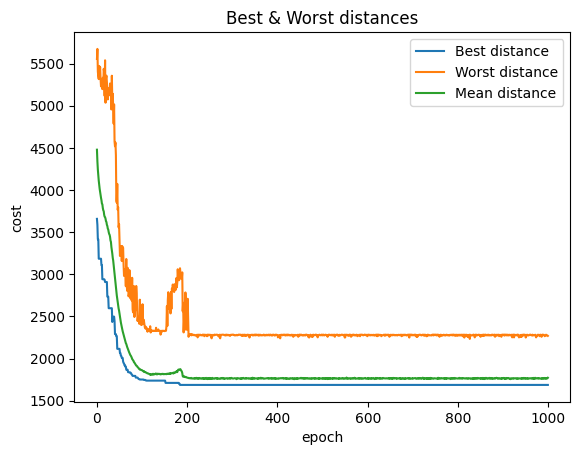

In [ ]:
EA = Evolutionary_Algorithm(costs_matrix=costs_matrix, population_count=1000, selection_count=3, epoch=1000, c_rate=0.9, m_rate=0.5)
EA.Iterate()

pop-size:1000, c-rate:0.6, m-rate:0.5

epoch-1: best fitness =  3591
epoch-2: best fitness =  3450
epoch-3: best fitness =  3450
epoch-4: best fitness =  3381
epoch-5: best fitness =  3381
epoch-6: best fitness =  3381
epoch-7: best fitness =  3238
epoch-8: best fitness =  3238
epoch-9: best fitness =  3238
epoch-10: best fitness =  3127
epoch-11: best fitness =  3003
epoch-12: best fitness =  3003
epoch-13: best fitness =  3003
epoch-14: best fitness =  3003
epoch-15: best fitness =  3014
epoch-16: best fitness =  3014
epoch-17: best fitness =  3014
epoch-18: best fitness =  2853
epoch-19: best fitness =  2853
epoch-20: best fitness =  2853
epoch-21: best fitness =  2930
epoch-22: best fitness =  2930
epoch-23: best fitness =  2985
epoch-24: best fitness =  2919
epoch-25: best fitness =  2919
epoch-26: best fitness =  2919
epoch-27: best fitness =  2817
epoch-28: best fitness =  2817
epoch-29: best fitness =  2817
epoch-30: best fitness =  2817
epoch-31: best fitness =  2817
epoch-32: best fitness =  2817
epoch-33: best fi

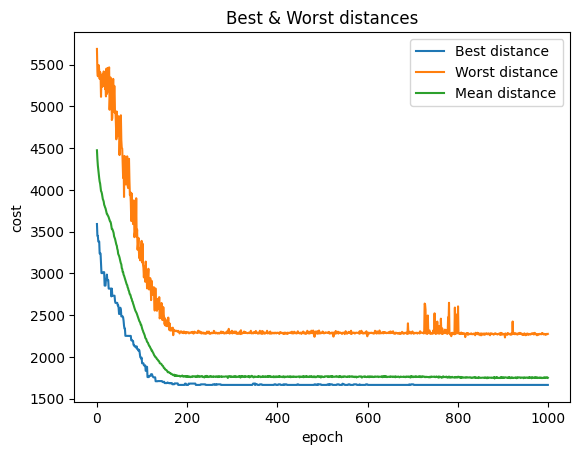

In [ ]:
EA = Evolutionary_Algorithm(costs_matrix=costs_matrix, population_count=1000, selection_count= 3, epoch=1000, c_rate=0.6, m_rate=0.5)
EA.Iterate()

In [ ]:
# *************************************************************************************************

# **ali535 - 535 citie**s

In [ ]:
df = pd.read_csv('/content/ali535xml.csv')
costs = df['cost'].values
costs_matrix = np.insert(costs, np.arange(0, len(costs)+1, 535), 0).reshape(535, 535)

epoch-1: best fitness = 3315511, min_fitness till now: 3315511
epoch-2: best fitness = 3315511, min_fitness till now: 3315511
epoch-3: best fitness = 3315511, min_fitness till now: 3315511
epoch-4: best fitness = 3315511, min_fitness till now: 3315511
epoch-5: best fitness = 3275150, min_fitness till now: 3275150
epoch-6: best fitness = 3275150, min_fitness till now: 3275150
epoch-7: best fitness = 3275150, min_fitness till now: 3275150
epoch-8: best fitness = 3267386, min_fitness till now: 3267386
epoch-9: best fitness = 3267386, min_fitness till now: 3267386
epoch-10: best fitness = 3267386, min_fitness till now: 3267386
epoch-11: best fitness = 3245336, min_fitness till now: 3245336
epoch-12: best fitness = 3245336, min_fitness till now: 3245336
epoch-13: best fitness = 3245336, min_fitness till now: 3245336
epoch-14: best fitness = 3245336, min_fitness till now: 3245336
epoch-15: best fitness = 3245336, min_fitness till now: 3245336
epoch-16: best fitness = 3245336, min_fitness til

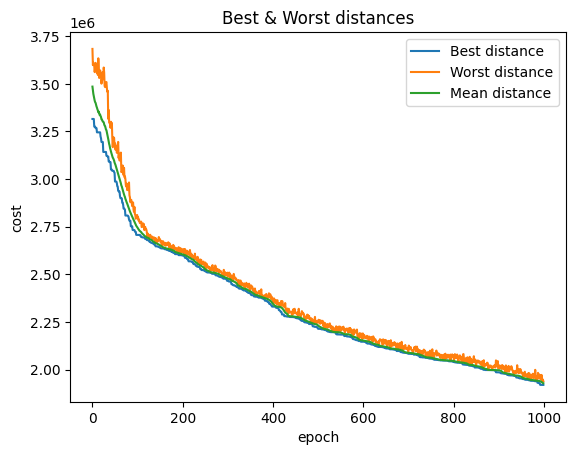

In [ ]:
EA = Evolutionary_Algorithm(costs_matrix=costs_matrix, population_count=200, selection_count= 3, epoch=1000, c_rate=0.9, m_rate=0.02)
EA.Iterate()

## Initial condition

### Testing with best conditions of bayg29: m-rate=0.5, c-rate=0.6

epoch-1: best fitness = 3273303, min_fitness till now: 3273303
epoch-2: best fitness = 3273303, min_fitness till now: 3273303
epoch-3: best fitness = 3270172, min_fitness till now: 3270172
epoch-4: best fitness = 3270172, min_fitness till now: 3270172
epoch-5: best fitness = 3266288, min_fitness till now: 3266288
epoch-6: best fitness = 3232882, min_fitness till now: 3232882
epoch-7: best fitness = 3232882, min_fitness till now: 3232882
epoch-8: best fitness = 3231881, min_fitness till now: 3231881
epoch-9: best fitness = 3223240, min_fitness till now: 3223240
epoch-10: best fitness = 3223240, min_fitness till now: 3223240
epoch-11: best fitness = 3223240, min_fitness till now: 3223240
epoch-12: best fitness = 3213390, min_fitness till now: 3213390
epoch-13: best fitness = 3213390, min_fitness till now: 3213390
epoch-14: best fitness = 3210152, min_fitness till now: 3210152
epoch-15: best fitness = 3210152, min_fitness till now: 3210152
epoch-16: best fitness = 3210152, min_fitness til

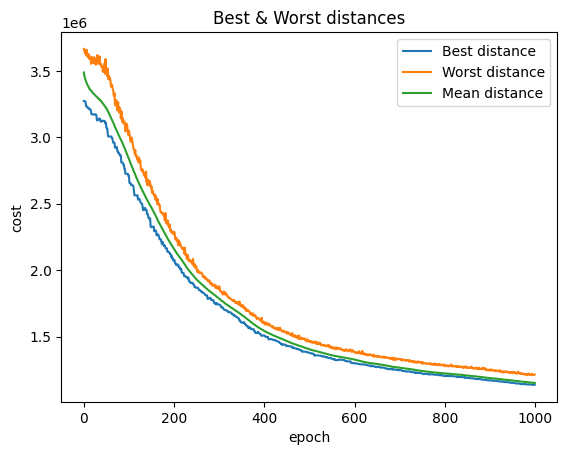

In [ ]:
EA = Evolutionary_Algorithm(costs_matrix=costs_matrix, population_count=1000, selection_count= 3, epoch=1000, c_rate=0.6, m_rate=0.5)
EA.Iterate()

epoch-1: best fitness = 3321766, min_fitness till now: 3321766
epoch-2: best fitness = 3290379, min_fitness till now: 3290379
epoch-3: best fitness = 3290379, min_fitness till now: 3290379
epoch-4: best fitness = 3287669, min_fitness till now: 3287669
epoch-5: best fitness = 3251179, min_fitness till now: 3251179
epoch-6: best fitness = 3251179, min_fitness till now: 3251179
epoch-7: best fitness = 3238232, min_fitness till now: 3238232
epoch-8: best fitness = 3238232, min_fitness till now: 3238232
epoch-9: best fitness = 3219323, min_fitness till now: 3219323
epoch-10: best fitness = 3220114, min_fitness till now: 3219323
epoch-11: best fitness = 3220114, min_fitness till now: 3219323
epoch-12: best fitness = 3214024, min_fitness till now: 3214024
epoch-13: best fitness = 3197079, min_fitness till now: 3197079
epoch-14: best fitness = 3197079, min_fitness till now: 3197079
epoch-15: best fitness = 3206505, min_fitness till now: 3197079
epoch-16: best fitness = 3206505, min_fitness til

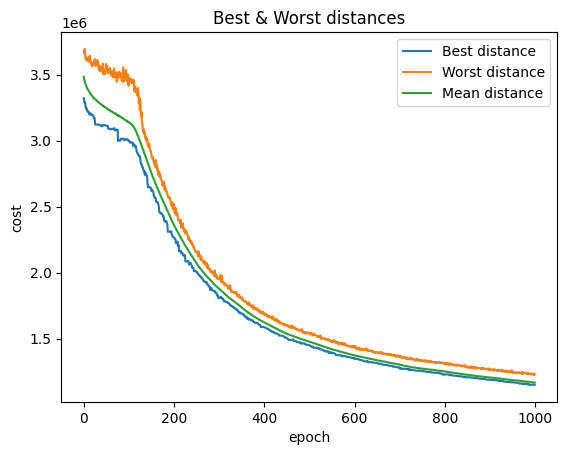

In [ ]:
EA = Evolutionary_Algorithm(costs_matrix=costs_matrix, population_count=1000, selection_count= 3, epoch=1000, c_rate=0.9, m_rate=0.5)
EA.Iterate()

### Min distance reached so far for pop-size=50, epocs=20000

Streaming output truncated to the last 5000 lines.
epoch-15001: best fitness = 1004400, min_fitness till now: 1003479
epoch-15002: best fitness = 1004400, min_fitness till now: 1003479
epoch-15003: best fitness = 1004400, min_fitness till now: 1003479
epoch-15004: best fitness = 1004495, min_fitness till now: 1003479
epoch-15005: best fitness = 1004495, min_fitness till now: 1003479
epoch-15006: best fitness = 1003987, min_fitness till now: 1003479
epoch-15007: best fitness = 1003929, min_fitness till now: 1003479
epoch-15008: best fitness = 1003929, min_fitness till now: 1003479
epoch-15009: best fitness = 1003929, min_fitness till now: 1003479
epoch-15010: best fitness = 1003976, min_fitness till now: 1003479
epoch-15011: best fitness = 1003976, min_fitness till now: 1003479
epoch-15012: best fitness = 1003929, min_fitness till now: 1003479
epoch-15013: best fitness = 1003929, min_fitness till now: 1003479
epoch-15014: best fitness = 1003933, min_fitness till now: 1003479
epoch-15015

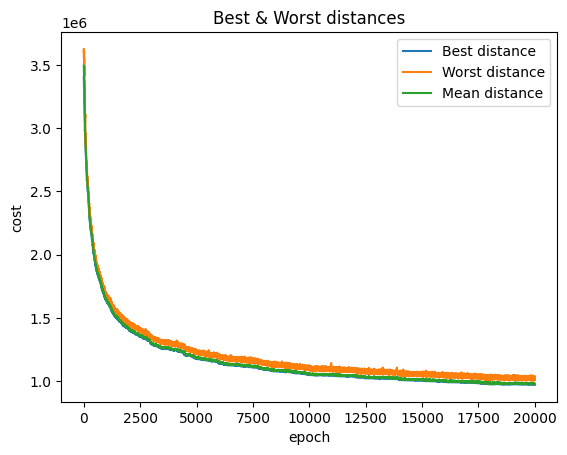

In [ ]:
EA = Evolutionary_Algorithm(costs_matrix=costs_matrix, population_count=50, selection_count= 3, epoch=20000, c_rate=0.9, m_rate=0.5)
EA.Iterate()